In [1]:
import pandas as pd
import math
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("gene.csv",index_col = 0)

Text(0, 0.5, 'explained variance ratio(%)')

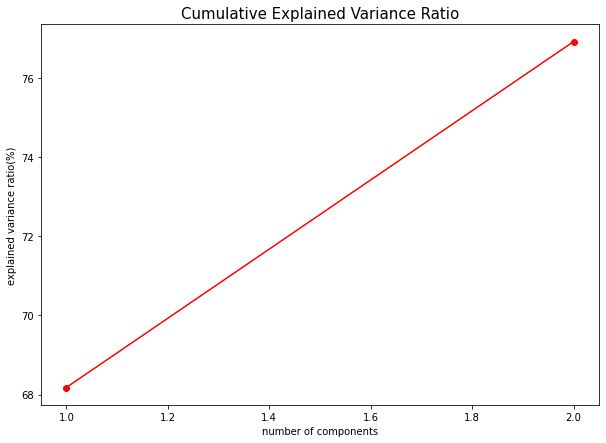

In [4]:
# Only project by pc1 and pc2
from sklearn.preprocessing import scale
data_norm = scale(data)
pca = PCA(n_components = 2)
pca.fit(data_norm)

In [5]:
pca_df = pca.transform(data_norm)
pca_df.shape

(23684, 2)

In [6]:
u = pca.components_.reshape([52,2])
z = u.T.dot(data_norm.T)
df_approx = u.dot(z).reshape(data.shape)

In [7]:
data_res = pd.DataFrame(data=(data_norm-df_approx),index = data.index, columns = data.columns)

In [8]:
data_res.head(3)

,CY58_1_CD45_F08_S1028_comb,CY58_1_CD45_A05_S965_comb,CY58_1_CD45_D01_S997_comb,cy80.Cd45.pos.Pd1.neg.S293.E05.S293.comb,cy82.CD45.pos.3.A07.S7.comb,cy82.CD45.pos.3.B08.S20.comb,cy53.1.CD45.pos.2.A04.S964.comb,cy53.1.CD45.pos.1.D01.S37.comb,cy53.1.CD45.pos.2.B08.S980.comb,cy53.1.CD45.pos.1.F04.S64.comb,...,cy60_1_cd_45_pos_3_C04_S316_comb,CY89FNA_A03_S195_comb,CY88CD45POS_2_F07_S451_comb,CY88CD45_150813_D05_S329_comb,CY88CD45POS_2_G06_S462_comb,CY94CD45POS_1_E04_S148_comb,CY88CD45POS_2_F09_S453_comb,CY84_PRIM_POS_All_7_E07_S247_comb,CY84_PRIM_POS_All_7_B06_S210_comb,CY84_PRIM_POS_All_8_E10_S154_comb
C9orf152,-0.046124,-3.545455,-0.062904,0.006041,-0.010713,-0.009014,-0.043557,-0.075699,-0.017701,-0.044791,...,-0.100306,-0.008015,-0.029219,-0.162966,-0.033382,0.008594,-0.022169,-0.000458,0.015679,0.007504
RPS11,9.229329,8.760094,2.113379,2.894422,0.841377,5.114128,7.937011,4.039091,17.063287,7.272768,...,4.690430,2.870081,7.721619,7.468801,10.606953,7.092032,3.268144,-0.087569,1.324649,3.287528
ELMO2,1.229986,-0.047597,-0.042117,-0.079039,0.003833,0.149355,-0.027639,-0.025661,0.089242,-0.022666,...,-0.060442,-0.007436,1.495882,0.004034,-0.033106,-0.000725,-0.053493,0.000876,1.008937,0.007504


<AxesSubplot:>

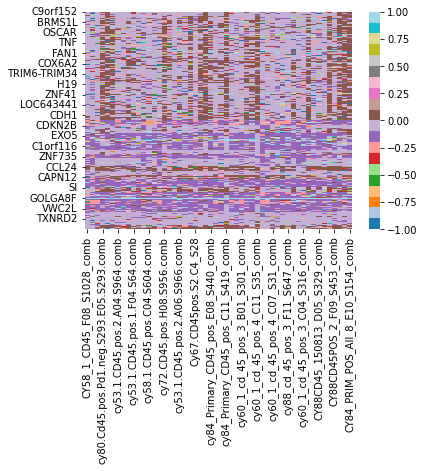

In [9]:
sns.heatmap(data_res, annot=False, vmin=-1, vmax=1, cmap="tab20")

## MEBF

In [148]:
def matrix_product(a,b):
    # follow online instruction of binary matrix production
    # https://www2.math.upenn.edu/~deturck/m170/wk8/lecture/matrix.html
    x = np.zeros([a.shape[0],b.shape[1]])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            sum = 0
            for k in range(b.shape[0]):
                sum += (a[i,k]*b[k,j])
            x[i,j] = sum % 2
    return x

In [11]:
def matrix_product_paper(a,b):
    x = np.zeros([a.shape[0],b.shape[1]])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            for k in range(a.shape[1]):
                if (a[i,k] or b[k,j]) == 1:
                    tmp = 1
                    break;
                else:
                    tmp = 0
            x[i,j] = tmp
    return x

In [176]:
def matrix_subtract(a,b):
    """
    parameter:
        a, of shape m*n
        b, of shape m*n
    return:
        res, of shape m*n
    """
    res = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            res[i][j] = int((a[i][j] and (not b[i][j])) or ((not a[i][j]) and b[i][j]))
    return res

In [58]:
def reconstruct(x,d,e,f,g):
    # reconstruct matrix based on cols
    col_df_1 = pd.DataFrame(d.reshape(-1,1), index =x.index) # m x 1 matrix, samples
    col_df_2 = pd.DataFrame(np.array(e).reshape(1,-1), columns = x.columns) # 1 x n matrix, features
    col_df_1.sort_index(axis = 0, inplace=True)
    col_df_2.sort_index(axis = 1, inplace=True)
    # reconstruct matrix based on rows
    row_df_1 = pd.DataFrame(np.array(g).reshape(-1,1),index = x.index)
    row_df_2 = pd.DataFrame(f.reshape(1,-1),columns = x.columns)
    row_df_1.sort_index(axis = 0, inplace=True)
    row_df_2.sort_index(axis = 1, inplace=True)
    # col pattern production
    col_pattern = matrix_product(col_df_1.values, col_df_2.values)
    # row pattern production
    row_pattern = matrix_product(row_df_1.values, row_df_2.values)
    return col_pattern, row_pattern, col_df_1, col_df_2, row_df_1, row_df_2

In [153]:
def bi_growth(x, t=0.9):
    """
    parameter: 
        x, the input Binary Matrix
        t, the threshold of vector similarity
    output:
        (a,b):
            a: list of rows(columns) of high similarity with b
            b: median row(column) of x
    """
    # UTL operation on X
    # drop columns and rows with all zeros
    x = x.loc[(x!=0).any(axis=1)]
    x = x.loc[:, (x != 0).any(axis=0)]
    # reorder based on idea in MEBF paper
    idx = x.eq(1).sum(axis=1).sort_values(ascending=False).index
    x = x.reindex(idx)
    cols = x.eq(1).sum(axis=0).sort_values(ascending=True).index
    x = x[cols]
    # d represents the median column of x
    med_col = len(x.columns) // 2
    # d = x[med_col].values
    d = x.values[:,med_col]
    # f represents the median row of x
    med_row = len(x.index) // 2
    # f = x.loc[med_row].values
    f=x.values[med_row,:]
    # iterate over each column and compute similarity
    e = []
    for col in x.columns:
        if (np.dot(x[col].values, d) / np.dot(d,d)) >= t:
            e.append(1)
        else:
            e.append(0)
    # iterate over each column and compute similarity
    g = []
    for row in x.index:
        if (np.dot(x.loc[row].values, f) / np.dot(f,f)) >= t:
            g.append(1)
        else:
            g.append(0)
    # reconstruct the approximation matrix based on rows and cols
    col_pattern, row_pattern,col_df_1,col_df_2,row_df_1,row_df_2 = reconstruct(x,d,e,f,g)
    # sort rows and columns
    x.sort_index(axis = 0,inplace=True)
    x.sort_index(axis = 1,inplace=True)
    # compute residule
    col_residule = sum(matrix_subtract(x.values, col_pattern)).sum()
    row_residule = sum(matrix_subtract(x.values, row_pattern)).sum()
    # compare cost
    if col_residule< row_residule:
        # col pattern is better
        return col_df_1, col_df_2
    else:
        # row pattern is better
        return row_df_1,row_df_2

In [24]:
def vector_and_op(a,b):
    res = list()
    for val in zip(a,b):
        if(val[0] and val[1]):
            res.append(1)
        else:
            res.append(0)
    return np.array(res).reshape(a.shape)

In [81]:
def weak_signal_detection(x,t=0.9):
    # UTL operation on X
    # drop columns and rows with all zeros
    x = x.loc[(x!=0).any(axis=1)]
    x = x.loc[:, (x != 0).any(axis=0)]
    # UTL operation on X
    idx = x.eq(1).sum(axis=1).sort_values(ascending=False).index
    x = x.reindex(idx)
    cols = x.eq(1).sum(axis=0).sort_values(ascending=True).index
    x = x[cols]
    # compute d_1
    d_1 = vector_and_op(x.values[:,-2],x.values[:,-1])
    # iterate over each column and compute similarity, filter cols
    e_1 = []
    for col in x.columns:
        if (np.dot(x[col].values, d_1) / np.dot(d_1,d_1)) >= t:
            e_1.append(1)
        else:
            e_1.append(0)
    # iterate over each column and compute similarity, filter rows
    d_2 = vector_and_op(x.values[0,:],x.values[1,:])
    e_2 = []
    for row in x.index:
        if (np.dot(x.loc[row].values, d_2) / np.dot(d_2,d_2)) >= t:
            e_2.append(1)
        else:
            e_2.append(0)
    # reconstruct the approximation matrix based on rows and cols
    pattern_1, pattern_2, l1_1,l1_2,l2_1,l2_2 = reconstruct(x,d_1,e_1,d_2,e_2)
    # sort by index and columns
    x.sort_index(axis = 0,inplace=True)
    x.sort_index(axis = 1,inplace=True)
    # compute residule
    l1 = matrix_subtract(x.values, pattern_1)
    l2 = matrix_subtract(x.values, pattern_2)
     # compare cost
    if sum(l1).sum() < sum(l2).sum():
        return l1_1,l1_2
    else:
        return l2_1,l2_2

In [256]:
def MEBF(x,t=0.8):
    # re_A, re_B to record the pattern
    re_A = pd.DataFrame(index =x.index.values)
    re_B = pd.DataFrame(columns = x.columns.values)
    cost = float('inf')
    x_residule = x.copy()
    while True:
        new_1, new_2 = bi_growth(x_residule,t)
        # check whether new pattern could fit better
        A_tmp = pd.concat([re_A,new_1],axis = 1).fillna(0)
        B_tmp = pd.concat([re_B,new_2],axis = 0).fillna(0)
        tmp_residule = matrix_subtract(x.values,matrix_product(A_tmp.values,B_tmp.values))
        if sum(tmp_residule).sum() > cost:
            # weak signal detection
            l1,l2 = weak_signal_detection(x_residule,t)
            A_tmp = pd.concat([re_A,l1],axis = 1).fillna(0)
            B_tmp = pd.concat([re_B,l2],axis = 0).fillna(0)
            tmp_residule = matrix_subtract(x.values,matrix_product(A_tmp.values,B_tmp.values))
            print("weak detection")
            print("old cost", cost)
            print("new cost", sum(tmp_residule).sum())
            if sum(tmp_residule).sum() >= cost:
                print("no more pattern, break")
                break
        # update re_A, re_B, and cost
        re_A = A_tmp.copy()
        re_B = B_tmp.copy()
        cost = sum(tmp_residule).sum()
        # update x_residule
        tmp = pd.DataFrame(matrix_product(new_1.values,new_2.values), index = new_1.index, columns = new_2.columns)
        for i in tmp.index:
            for j in tmp.columns:
                if(tmp.loc[i][j] == 1):
                    x_residule.loc[i][j] = 0
        if sum(x_residule.values).sum() == 0:
            break
    return re_A, re_B

In [260]:
x_in_paper = pd.DataFrame(np.array([[1,1,0,1,1,1,0,1,0,0,0],[1,1,1,1,1,1,1,1,1,1,1],[1,1,0,1,1,1,1,0,1,0,1],
         [0,1,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0,1,0,0],
         [0,0,0,1,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1,0],[1,1,0,1,0,1,1,0,0,0,0],
         [1,1,1,1,1,0,0,0,0,0,0,],[1,1,0,1,1,0,0,0,0,0,0]]), index = range(1,12), columns = range(1,12))
A,B = MEBF(x_in_paper,0.8)

<AxesSubplot:>

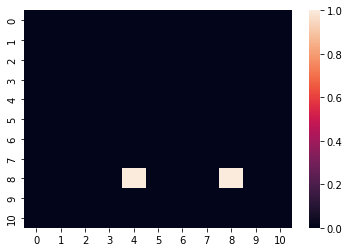

In [261]:
sns.heatmap(matrix_subtract(x_in_paper.values, matrix_product(A.values, B.values)), annot=False, vmin=0, vmax=1)

In [262]:
# try BMF on our data
t1 = data_res.copy()
t1[t1>0.5] = 1
t1[t1<-0.5] = 1
t1[t1!=1] =0
t2 = data_res.copy()
t2[t1>0.25] = 1
t2[t1<-0.25] = 1
t2[t1!=1] =0

In [263]:
A1,B1 = MEBF(t1,0.8)
A2,B2 = MEBF(t2,0.8)

<AxesSubplot:>

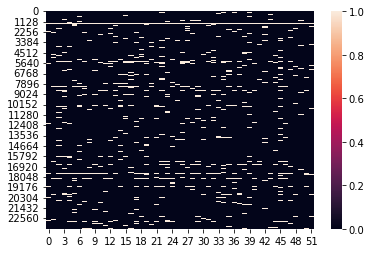

In [273]:
sns.heatmap(A1.values, annot=False, vmin=0, vmax=1)

<AxesSubplot:>

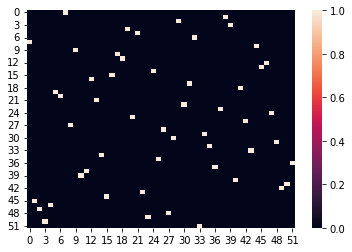

In [274]:
sns.heatmap(B1.values, annot=False, vmin=0, vmax=1)

In [277]:
sum(matrix_subtract(t1.values, matrix_product(A1.values, B1.values))).sum(),sum(matrix_subtract(t2.values, matrix_product(A2.values, B2.values))).sum()

(0.0, 0.0)

### Perfectly fit. But the process is kind of random.